In [1]:
from importlib import reload
import src.UNET
import src.preprocessing

reload(src.UNET)
reload(src.preprocessing)

import numpy as np
from src.UNET import UNET
from src.preprocessing import data_generator
from keras.models import load_model, Model

import matplotlib.pyplot as plt


Using TensorFlow backend.


In [2]:
# Load images
PATCH_SIZE = 128

x_train, x_test, y_train, y_test = data_generator(200, num_images = 15, rotation_degs=[])


In [3]:
# Build model equal to the tested model

unet = UNET(args = '' , image_shape = (256, 256, 3), layers =4)
unet.build_model(num_gpus = 0)
model = unet.get_model()


Building model with 4 layers
Filtersizes being used in UNET: [64, 128, 256, 512, 1024]
Bulding contraction layers at layer: 1 and filtersize: 64
Bulding contraction layers at layer: 2 and filtersize: 128
Bulding contraction layers at layer: 3 and filtersize: 256
Bulding contraction layers at layer: 4 and filtersize: 512
Building bottleneck at layer: 4 and filtersize: 1024
Building expansion at layer: 4 and filtersize: 512
Building expansion at layer: 3 and filtersize: 256
Building expansion at layer: 2 and filtersize: 128
Building expansion at layer: 1 and filtersize: 64
Compiling model...
Model compiled.


In [5]:
unet.describe_model()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 64) 1792        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 256, 256, 64) 256         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 256, 256, 64) 36928       batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [ ]:
model.load_weights('./models/keras-job-dir_padded_200_filt_6_lay4_extra_train_weights_epoch42_F10.9514_15.48.h5')

ValueError: You are trying to load a weight file containing 1 layers into a model with 38 layers.

In [148]:
model.evaluate(x_test, y_test)

48/48 [==============================] - 19s 388ms/step


[0.2704344689846039,
 0.9258680939674377,
 0.9218296408653259,
 0.9300587773323059,
 0.830560028553009]

In [167]:
# Run predictions
n = 6
pred = model.predict(x_train[n:n+1, :, :, :])
pred[pred > 0.5] = 1
pred[pred <= 0.5] = 0

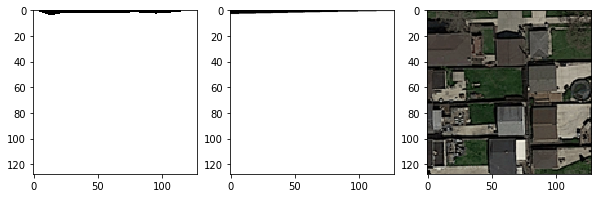

In [168]:

f = plt.figure(figsize = (10, 15))
plt.subplot(1,3,1)
plt.imshow(pred.reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,3,2)
plt.imshow(y_train[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,3,3)
plt.imshow(x_train[n].reshape(PATCH_SIZE, PATCH_SIZE, 3))

In [19]:
from skimage.transform import resize

NEW_SIZE = 608
p = np.asarray([resize(pred[i], (608, 608, 1)) for i in range(len(pred))])
p[0].shape

(608, 608, 1)

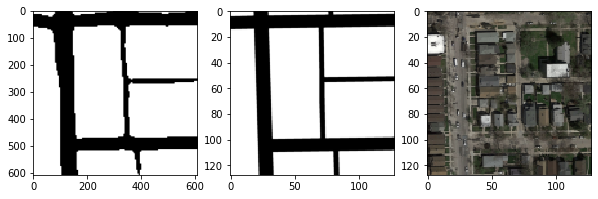

In [20]:
f = plt.figure(figsize = (10, 15))
plt.subplot(1,3,1)
plt.imshow(p.reshape(NEW_SIZE, NEW_SIZE), cmap = 'Greys')
plt.subplot(1,3,2)
plt.imshow(y_train[n].reshape(PATCH_SIZE, PATCH_SIZE), cmap = 'Greys')
plt.subplot(1,3,3)
plt.imshow(x_train[n].reshape(PATCH_SIZE, PATCH_SIZE, 3))

In [183]:
from importlib import reload
import src.create_submission
reload(src.create_submission)
from src.create_submission import create_submission

img_patches, cropped_pred = create_submission('patches_sub.csv', model)

Loaded images to patches

Succesfully created submission.


In [170]:
import src.submission_to_mask

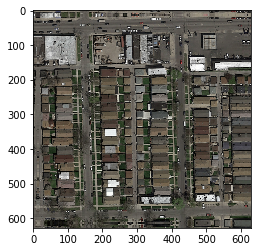

In [4]:
cropped_pred = np.load('./predictions.npy')
cropped_pred.shape

(450, 200, 200, 1)

In [5]:
from src.preprocessing import patches_to_images
from skimage.transform import resize

patch_size = 200
predictions = patches_to_images(np.asarray(cropped_pred), patch_size, img_side_len = 600)

# Fix labels
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0

# Scale back up
predictions = np.asarray([resize(predictions[i], (608, 608, 1)) for i in range(len(predictions))])

In [6]:
from src.create_submission import save_test_img
from src.mask_to_submission import masks_to_submission

# Save predictions as imgs, and keep the names
image_names = save_test_img(predictions)

masks_to_submission('MEGA_BIG_BOY.csv', image_names)

print('\nSuccesfully created submission.')




Succesfully created submission.


In [20]:
import src.submission_to_mask